In [1]:
#Análise das combinações autor-doença-gene:
import pandas as pd

# Carregar o dataset
df = pd.read_csv('all_articles_files_names_merge_final3.csv')

# Identificar as combinações mais comuns de autor-doença-gene
combinacoes_frequentes = df.groupby(['author/disease', 'gene']).size().reset_index(name='count')
combinacoes_frequentes = combinacoes_frequentes.sort_values(by='count', ascending=False)

print("Combinações mais comuns de autor-doença-gene:")
print(combinacoes_frequentes.head(10))

Combinações mais comuns de autor-doença-gene:
                             author/disease                             gene  \
352       Berger T/Disease of mental health               multiple sclerosis   
3947       Patti F/Disease of mental health               multiple sclerosis   
2345    Kalincik T/Disease of mental health               multiple sclerosis   
5965  Zetterberg H/Disease of mental health  glial fibrillary acidic protein   
4365         Sa MJ/Disease of mental health               multiple sclerosis   
4422    Salvetti M/Disease of mental health               multiple sclerosis   
122   Alroughani R/Disease of mental health               multiple sclerosis   
416      Blennow K/Disease of mental health  glial fibrillary acidic protein   
3863     Ozakbas S/Disease of mental health               multiple sclerosis   
2031    Horakova D/Disease of mental health               multiple sclerosis   

      count  
352       8  
3947      8  
2345      7  
5965      7  
436

In [2]:
# Estatísticas descritivas
print(df.describe())

# Contagem de valores únicos em cada coluna
print(df.nunique())

                id  article_count
count  6960.000000    6960.000000
mean   5065.070402       3.589368
std    2840.799199       3.119694
min      15.000000       2.000000
25%    2614.000000       2.000000
50%    4859.000000       2.000000
75%    7641.000000       4.000000
max    9573.000000      27.000000
id                2106
author/disease    2623
gene               275
article_count       16
dtype: int64


In [2]:
#Análise das combinações autor-doença-gene:
import pandas as pd

# Carregar o dataset
df = pd.read_csv('all_articles_files_names_merge_final2.csv')

# Identificar as combinações mais comuns de autor-doença-gene
combinacoes_frequentes = df.groupby(['author/disease', 'gene']).size().reset_index(name='count')
combinacoes_frequentes = combinacoes_frequentes.sort_values(by='count', ascending=False)

print("Combinações mais comuns de autor-doença-gene:")
print(combinacoes_frequentes.head(10))


Combinações mais comuns de autor-doença-gene:
                              author/disease                             gene  \
1059       Berger T/Disease of mental health               multiple sclerosis   
10135       Patti F/Disease of mental health               multiple sclerosis   
15016  Zetterberg H/Disease of mental health  glial fibrillary acidic protein   
6178     Kalincik T/Disease of mental health               multiple sclerosis   
11294         Sa MJ/Disease of mental health               multiple sclerosis   
336    Alroughani R/Disease of mental health               multiple sclerosis   
11421    Salvetti M/Disease of mental health               multiple sclerosis   
1229      Blennow K/Disease of mental health  glial fibrillary acidic protein   
4567      Gouider R/Disease of mental health               multiple sclerosis   
3480    Evangelou N/Disease of mental health               multiple sclerosis   

       count  
1059       8  
10135      8  
15016      7  
61

In [3]:
# Estatísticas descritivas
print(df.describe())

# Contagem de valores únicos em cada coluna
print(df.nunique())

                 id  article_count
count  16278.000000   16278.000000
mean    4897.028259       2.107138
std     2809.700468       2.408760
min        0.000000       1.000000
25%     2459.000000       1.000000
50%     4821.000000       1.000000
75%     7389.750000       2.000000
max     9577.000000      27.000000
id                 9578
author/disease    11941
gene                344
article_count        17
dtype: int64


In [4]:
# Autores mais prolíficos:

# Ordenar o DataFrame em ordem decrescente com base no número de artigos (article_count)
autores_prolificos = df.sort_values(by='article_count', ascending=False)

# Exibir somente os top 10 autores mais prolíficos sem repetições
print("Top 10 Autores mais prolíficos:")
autores_no_top10 = set()
count = 0
for _, row in autores_prolificos.iterrows():
    author = row['author/disease']
    if author not in autores_no_top10:
        print(f"{author}: {row['article_count']} artigos")
        autores_no_top10.add(author)
        count += 1
    if count == 10:
        break

Top 10 Autores mais prolíficos:
Zetterberg H/Disease of mental health: 27 artigos
Li Y/Disease of mental health: 21 artigos
Blennow K/Disease of mental health: 19 artigos
Zhang Y/Disease of mental health: 16 artigos
Duchen MR/Pervasive developmental disorder: 14 artigos
Deneubourg C/Pervasive developmental disorder: 14 artigos
Fanto M/Pervasive developmental disorder: 14 artigos
Byrne SC/Pervasive developmental disorder: 14 artigos
Jungbluth H/Pervasive developmental disorder: 14 artigos
Gautel M/Pervasive developmental disorder: 14 artigos


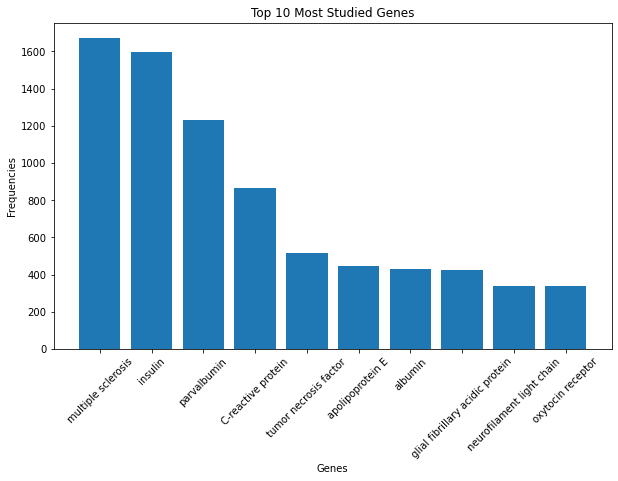

In [5]:
# Relação entre doenças e genes:
import matplotlib.pyplot as plt

# Criar um gráfico de barra da frequência dos genes
frequencia_gene = df['gene'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.bar(frequencia_gene.index, frequencia_gene.values)
plt.xlabel('Genes')
plt.ylabel('Frequencies')
plt.title('Top 10 Most Studied Genes')
plt.xticks(rotation=45)
plt.show()


In [8]:
import pandas as pd

# Lendo o arquivo CSV (substitua 'caminho/do/arquivo.csv' pelo caminho correto)
df = pd.read_csv('all_articles_files_names_merge_final2.csv')

# Lista de genes fornecidos
lista_genes = ['engrailed homeobox 2', 'arginine Vasopressin Receptor 1A,', 'SH3 And Multiple Ankyrin Repeat Domains 3', 'Homeobox protein engrailed-2', 'Reelin',' Gamma-aminobutyric acid type A receptor subunit beta-3','5-hydroxytryptamine','Vasopressin V1a receptor','Ubiquitin protein ligase E3A','Forkhead box protein P2']  # Substitua esta lista pelos genes desejados

# Converter todos os genes do DataFrame e da lista para letras minúsculas
df['gene'] = df['gene'].str.lower()
lista_genes = [gene.lower() for gene in lista_genes]

# Filtrar o DataFrame para conter apenas os genes da lista fornecida
df_filtrado = df[df['gene'].isin(lista_genes)]

# Contagem de genes
gene_counts = df_filtrado['gene'].value_counts()

# Tabela
data_table = pd.DataFrame({'Gene': gene_counts.index, 'Contagem': gene_counts.values})
print(data_table)



                                        Gene  Contagem
0  sh3 and multiple ankyrin repeat domains 3        43
1                                     reelin        22


In [5]:
#Análise da Presença de Genes Relacionados ao Autismo no Dataset:
import pandas as pd

# Lendo o arquivo CSV (substitua 'caminho/do/arquivo.csv' pelo caminho correto)
df = pd.read_csv('all_articles_files_names_merge_final2.csv')

# Lista de genes fornecidos
lista_genes = ['engrailed homeobox 2', 'arginine Vasopressin', 'SH3 And Multiple Ankyrin Repeat Domains 3', 'Reelin',' Gamma-aminobutyric acid type A receptor subunit beta-3','5-hydroxytryptamine','Disrupted in schizophrenia 1','Integrin subunit beta 3','Solute Carrier Family 6 Member 4','Ribosomal Protein L10']  # Substitua esta lista pelos genes desejados

# Converter todos os genes do DataFrame e da lista para letras minúsculas
df['gene'] = df['gene'].str.lower()
lista_genes = [gene.lower() for gene in lista_genes]

# Função para dividir o elemento da lista em palavras individuais
def split_words(gene):
    return gene.replace(')', '').split()

# Dividir os elementos da lista em palavras individuais
lista_genes_split = [split_words(gene) for gene in lista_genes]

# Filtrar o DataFrame para conter apenas os genes da lista fornecida
df_filtrado = pd.DataFrame()
for words in lista_genes_split:
    mask = df['gene'].apply(lambda x: all(word in x for word in words))
    df_filtrado = df_filtrado.append(df[mask])

# Contagem de genes
gene_counts = df_filtrado['gene'].value_counts()

# Tabela
data_table = pd.DataFrame({'Gene': gene_counts.index, 'Contagem': gene_counts.values})
print(data_table)



                                        Gene  Contagem
0                       arginine vasopressin       141
1  sh3 and multiple ankyrin repeat domains 3        43
2                                     reelin        22
3            5-hydroxytryptamine receptor 1b        11
4           solute carrier family 6 member 4         4


In [4]:
import pandas as pd

# Carregar o dataset a partir do arquivo CSV
dataset = pd.read_csv('all_articles_files_names_merge_final2.csv')

# Dividir a coluna "author/disease" para obter o nome do autor e o nome da doença
dataset[['Author', 'Disease']] = dataset['author/disease'].str.split('/', expand=True)

# Remover a coluna original "author/disease"
dataset.drop(columns=['author/disease'], inplace=True)

# Iterar sobre cada doença única no dataset e criar uma tabela para cada uma
for disease in dataset['Disease'].unique():
    # Filtrar os dados para a doença específica
    disease_data = dataset[dataset['Disease'] == disease]
    
    # Remover duplicatas de genes associados à doença
    unique_genes = disease_data['gene'].drop_duplicates()
    
    # Criar a tabela da doença com os genes únicos
    data_table = pd.DataFrame({'Gene': unique_genes})
    
    # Mostrar a tabela da doença
    print(f"Tabela para a doença: {disease}\n")
    display(data_table)
    print("\n")

Tabela para a doença: Asperger syndrome



,Gene
0,matrix metallopeptidase 9
4,multiple sclerosis
8,albumin
20,molybdenum cofactor sulfurase
28,androgen receptor
35,oxytocin receptor
40,cholecystokinin
48,insulin
54,catalase
64,ceruloplasmin




Tabela para a doença: Atypical autism



,Gene
226,huntingtin
228,C-reactive protein
244,oxytocin receptor
249,synaptophysin
255,myelin regulatory factor
261,arginine vasopressin
262,adhesion G protein-coupled receptor L3
268,D-aspartate oxidase
295,translocator protein
303,multiple sclerosis




Tabela para a doença: Autism spectrum disorder



,Gene
664,leptin
667,resistin
670,apelin
673,C-reactive protein
679,prolactin
...,...
2546,histidine decarboxylase
2565,thioredoxin
2574,caspase 1
2586,glutathione peroxidase 1




Tabela para a doença: Autistic disorder



,Gene
2626,glutaminase
2630,biotinidase
2641,insulin
2652,parvalbumin
2668,interleukin 6
...,...
3452,ceruloplasmin
3463,lysozyme
3469,apolipoprotein A1
3482,apolipoprotein B




Tabela para a doença: Developmental disorder of mental health



,Gene
3554,leptin
3557,resistin
3560,apelin
3563,Coats disease
3566,C-reactive protein
...,...
6671,proenkephalin
6675,thymoma
6682,7-dehydrocholesterol reductase
6686,gastrin




Tabela para a doença: Disease of mental health



,Gene
6728,insulin
6731,multiple sclerosis
6751,chloride voltage-gated channel 2
6759,C-reactive protein
6789,renin
...,...
13855,paired box 5
14052,steroidogenic acute regulatory protein
14084,thymic stromal lymphopoietin
14088,interferon gamma




Tabela para a doença: Pervasive developmental disorder



,Gene
14226,leptin
14229,resistin
14232,apelin
14235,glutaminase
14242,biotinidase
...,...
16202,moesin
16225,glutamate ionotropic receptor AMPA type subunit 2
16231,alpha-2-macroglobulin
16247,haptoglobin


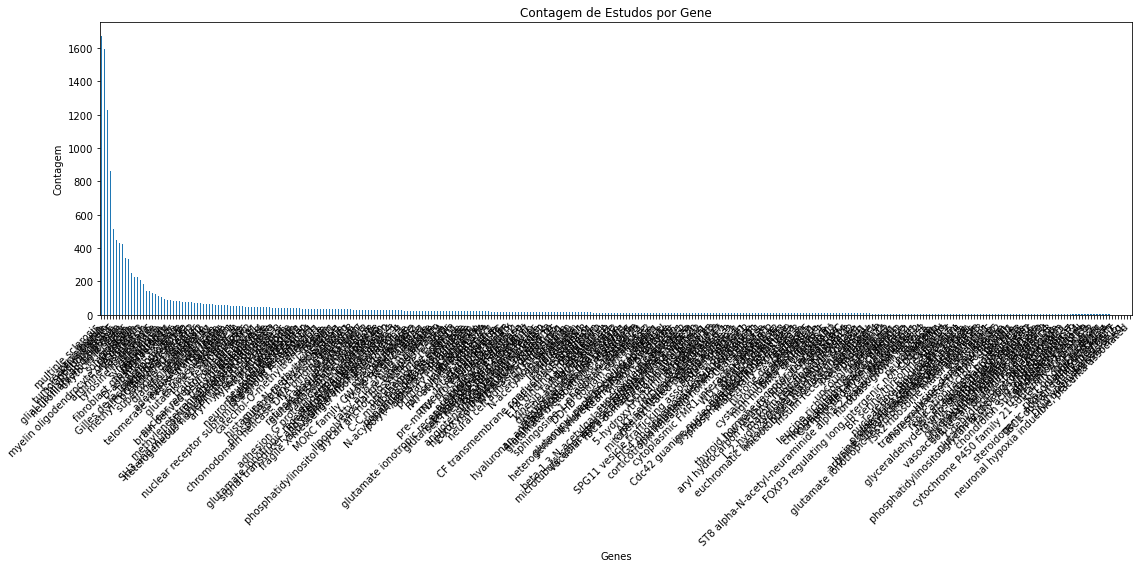

,Gene,Contagem
0,multiple sclerosis,1670
1,insulin,1595
2,parvalbumin,1231
3,C-reactive protein,865
4,tumor necrosis factor,514
...,...,...
339,TBC1 domain family member 7,2
340,paired box 5,2
341,hypomelanosis of Ito,2
342,DNA methyltransferase 1,2


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Lendo o arquivo CSV (substitua 'caminho/do/arquivo.csv' pelo caminho correto)
df = pd.read_csv('all_articles_files_names_merge_final2.csv')

# Contagem de genes
gene_counts = df['gene'].value_counts()

# Aumentar o tamanho do gráfico de barras
plt.figure(figsize=(16, 8))  # Aumente os valores de width e height para alterar o tamanho
gene_counts.plot(kind='bar')
plt.xlabel('Genes')
plt.ylabel('Contagem')
plt.title('Contagem de Estudos por Gene')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Tabela
data_table = pd.DataFrame({'Gene': gene_counts.index, 'Contagem': gene_counts.values})
display(data_table)


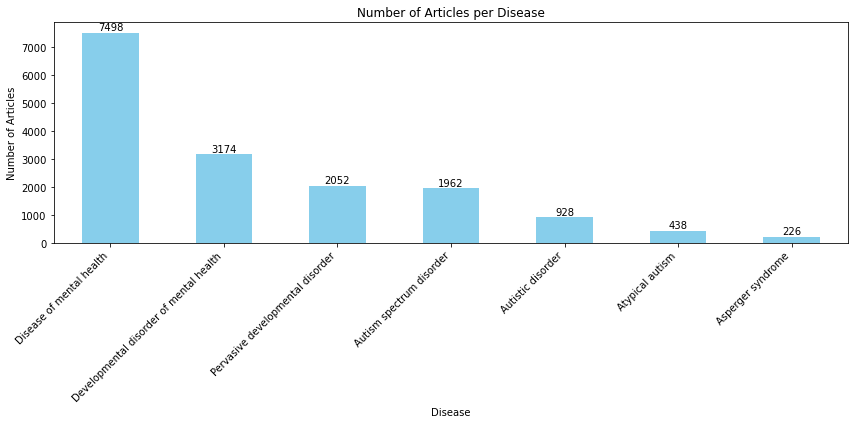

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the full CSV file
df = pd.read_csv('all_articles_files_names_merge_final2.csv')

# Split the "author/disease" column into separate columns
df[['author', 'disease']] = df['author/disease'].str.split('/', expand=True)

# Count the frequency of each disease
disease_counts = df['disease'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 6))
ax = disease_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Articles per Disease')
plt.xlabel('Disease')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')

# Add values on top of the bars
for i, v in enumerate(disease_counts):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Show the chart
plt.show()



In [8]:
import pandas as pd

# Carregar o arquivo CSV completo
df = pd.read_csv('all_articles_files_names_merge_final2.csv')

# Dividir a coluna "author/disease" em duas colunas separadas
df[['author', 'disease']] = df['author/disease'].str.split('/', expand=True)

# Contar a frequência de cada doença
disease_counts = df['disease'].value_counts().reset_index()
disease_counts.columns = ['Doença', 'Quantidade de Artigos']

# Exibir a tabela de frequência das doenças
print(disease_counts)



                                    Doença  Quantidade de Artigos
0                 Disease of mental health                   7498
1  Developmental disorder of mental health                   3174
2         Pervasive developmental disorder                   2052
3                 Autism spectrum disorder                   1962
4                        Autistic disorder                    928
5                          Atypical autism                    438
6                        Asperger syndrome                    226
